In [7]:
import os
import sys

build_path = "/Users/romainegele/Documents/Argonne/deephyper-benchmark/lib/LCBench/build"
api_path = os.path.join(build_path, "LCBench")
# data_path = os.path.join(api_path, "data", "six_datasets_lw.json")
# data_path = os.path.join(api_path, "data", "bench_full.json")
data_path = os.path.join(api_path, "data", "data_2k.json")

sys.path.insert(0, api_path)

import h5py

import matplotlib as mpl

def set_size(width, fraction=1):
    """Set figure dimensions to avoid scaling in LaTeX.

    Parameters
    ----------
    width: float
            Document textwidth or columnwidth in pts
    fraction: float, optional
            Fraction of the width which you wish the figure to occupy

    Returns
    -------
    fig_dim: tuple
            Dimensions of figure in inches
    """
    # Width of figure (in pts)
    fig_width_pt = width * fraction

    # Convert from pt to inches
    inches_per_pt = 1 / 72.27

    # Golden ratio to set aesthetic figure height
    # https://disq.us/p/2940ij3
    golden_ratio = (5**.5 - 1) / 2

    # Figure width in inches
    fig_width_in = fig_width_pt * inches_per_pt
    # Figure height in inches
    fig_height_in = fig_width_in * golden_ratio

    fig_dim = (fig_width_in, fig_height_in)

    return fig_dim

width = 234.8775 # in pt.
width, height = set_size(width, fraction=0.8) # in inch
print(width, height)

fontsize = 9
mpl.rcParams.update({
    "figure.figsize": (width, height), 
    "figure.facecolor": 'white', 
    "figure.edgecolor": 'white',
    "savefig.dpi": 360, 
    "figure.subplot.bottom": 0.5, 
    # Use LaTeX to write all text
    "text.usetex": True,
    "font.family": "serif",
    # Use 10pt font in plots, to match 10pt font in document
    "axes.labelsize": fontsize,
    "font.size": fontsize,
    # Make the legend/label fonts a little smaller
    "legend.fontsize": fontsize-2,
    "xtick.labelsize": fontsize-2,
    "ytick.labelsize": fontsize-2,
    # tight layout,
    "figure.autolayout": True,
})

import matplotlib.pyplot as plt

import numpy as np
import pandas as pd
from tqdm.auto import tqdm

from scipy.ndimage import uniform_filter1d
from scipy.stats import rankdata

2.6 1.6068883707497268


## Loading The Data

In [2]:
from api import Benchmark as LCBenchBenchmark


lcbench_bench = LCBenchBenchmark(data_path, cache=False)

==> Loading data...
==> No cached data found or cache set to False.
==> Reading json data...
==> Done.


In [3]:
from yahpo_gym import local_config
local_config.init_config()
local_config.set_data_path("/Users/romainegele/Documents/Argonne/deephyper-benchmark/lib/YAHPO/build/data/")

In [4]:
from yahpo_gym import *


yahpo_bench = BenchmarkSet(scenario="lcbench")

In [5]:
map_name2openmlid = {k:str(v) for k,v in zip(lcbench_bench.get_dataset_names(), lcbench_bench.get_openml_task_ids()) if str(v) in yahpo_bench.instances}
map_name2openmlid

{'APSFailure': '168868',
 'Amazon_employee_access': '34539',
 'Australian': '167104',
 'Fashion-MNIST': '189908',
 'KDDCup09_appetency': '3945',
 'MiniBooNE': '168335',
 'adult': '126025',
 'airlines': '189354',
 'albert': '189866',
 'bank-marketing': '126029',
 'blood-transfusion-service-center': '167184',
 'car': '189905',
 'christine': '168908',
 'cnae-9': '167185',
 'connect-4': '167201',
 'covertype': '7593',
 'credit-g': '167161',
 'dionis': '189873',
 'fabert': '168910',
 'helena': '168329',
 'higgs': '167200',
 'jannis': '168330',
 'jasmine': '189862',
 'jungle_chess_2pcs_raw_endgame_complete': '189909',
 'kc1': '167181',
 'kr-vs-kp': '167149',
 'mfeat-factors': '167152',
 'nomao': '126026',
 'phoneme': '167190',
 'segment': '189906',
 'shuttle': '146212',
 'sylvine': '189865',
 'vehicle': '167168',
 'volkert': '168331'}

  0%|          | 0/34 [00:00<?, ?it/s]

0it [00:00, ?it/s]

M.shape=(1000, 50)
R.shape=(1000, 50)


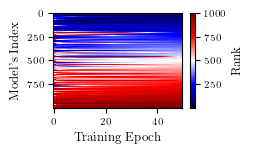

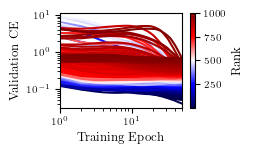

0it [00:00, ?it/s]

M.shape=(1000, 50)
R.shape=(1000, 50)


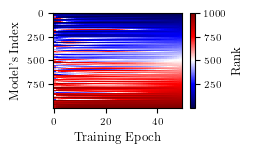

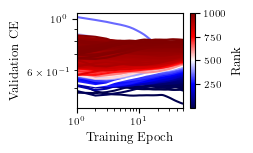

0it [00:00, ?it/s]

M.shape=(1000, 50)
R.shape=(1000, 50)


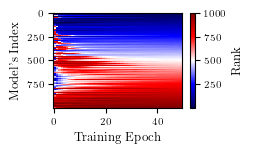

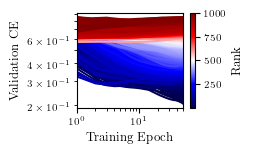

0it [00:00, ?it/s]

M.shape=(1000, 50)
R.shape=(1000, 50)


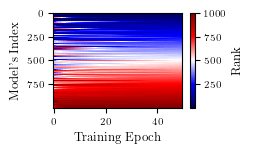

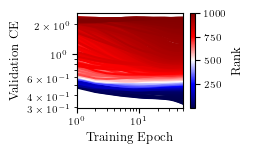

0it [00:00, ?it/s]

M.shape=(1000, 50)
R.shape=(1000, 50)


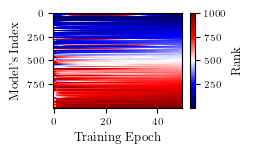

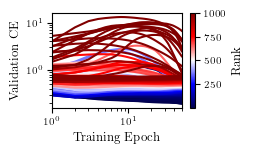

0it [00:00, ?it/s]

M.shape=(1000, 50)
R.shape=(1000, 50)


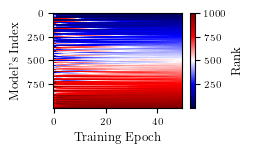

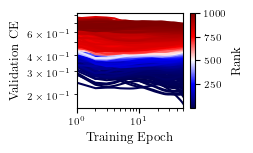

0it [00:00, ?it/s]

M.shape=(1000, 50)
R.shape=(1000, 50)


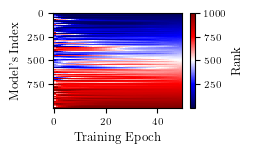

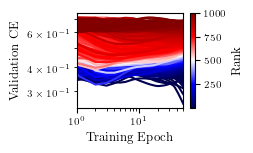

0it [00:00, ?it/s]

M.shape=(1000, 50)
R.shape=(1000, 50)


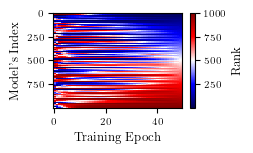

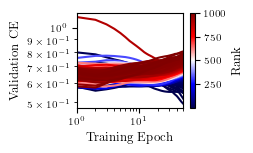

0it [00:00, ?it/s]

M.shape=(1000, 50)
R.shape=(1000, 50)


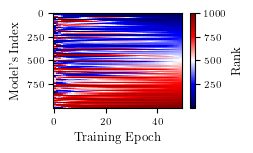

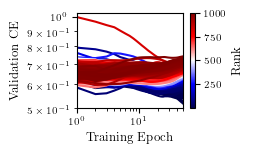

0it [00:00, ?it/s]

M.shape=(1000, 50)
R.shape=(1000, 50)


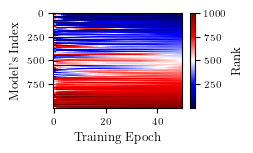

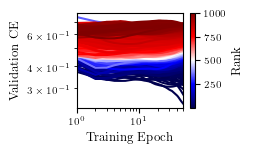

0it [00:00, ?it/s]

M.shape=(1000, 50)
R.shape=(1000, 50)


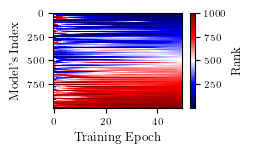

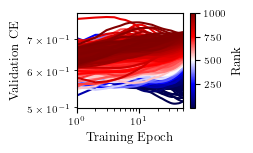

0it [00:00, ?it/s]

M.shape=(1000, 50)
R.shape=(1000, 50)


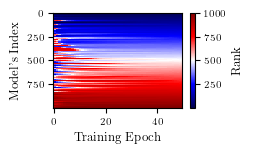

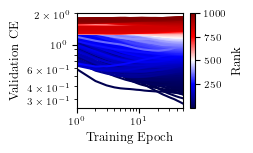

0it [00:00, ?it/s]

M.shape=(1000, 50)
R.shape=(1000, 50)


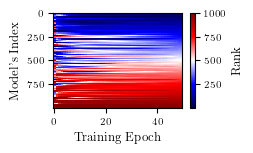

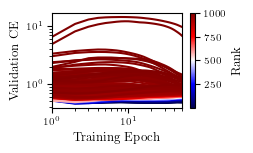

0it [00:00, ?it/s]

M.shape=(1000, 50)
R.shape=(1000, 50)


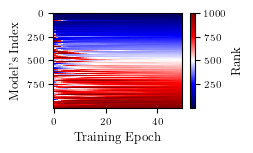

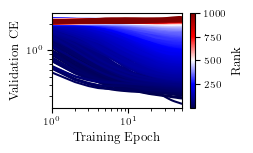

0it [00:00, ?it/s]

M.shape=(1000, 50)
R.shape=(1000, 50)


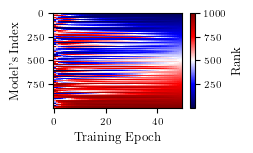

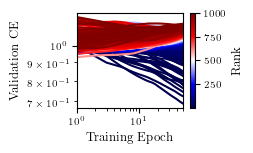

0it [00:00, ?it/s]

M.shape=(1000, 50)
R.shape=(1000, 50)


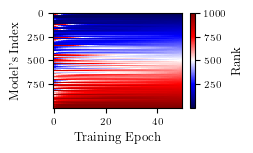

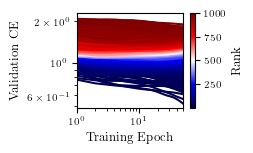

0it [00:00, ?it/s]

M.shape=(1000, 50)
R.shape=(1000, 50)


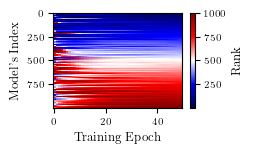

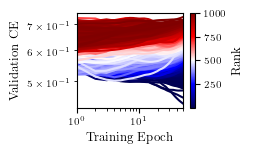

0it [00:00, ?it/s]

M.shape=(1000, 50)
R.shape=(1000, 50)


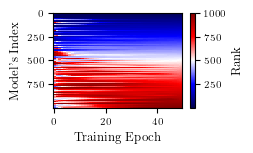

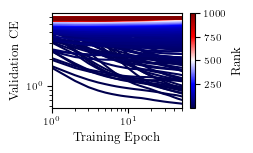

0it [00:00, ?it/s]

M.shape=(1000, 50)
R.shape=(1000, 50)


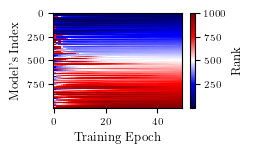

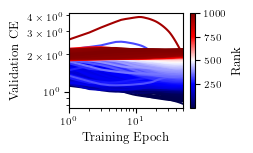

0it [00:00, ?it/s]

M.shape=(1000, 50)
R.shape=(1000, 50)


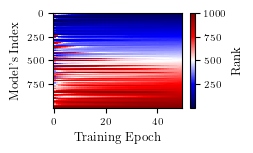

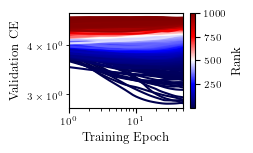

0it [00:00, ?it/s]

M.shape=(1000, 50)
R.shape=(1000, 50)


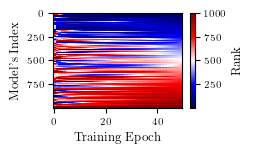

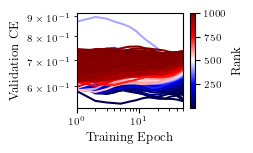

0it [00:00, ?it/s]

M.shape=(1000, 50)
R.shape=(1000, 50)


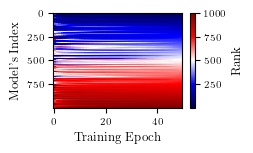

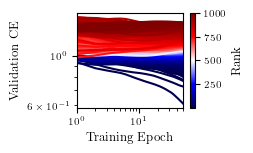

0it [00:00, ?it/s]

M.shape=(1000, 50)
R.shape=(1000, 50)


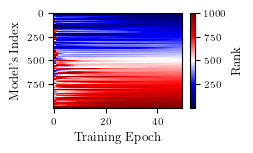

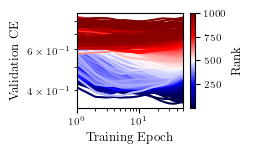

0it [00:00, ?it/s]

M.shape=(1000, 50)
R.shape=(1000, 50)


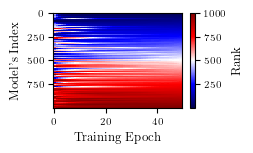

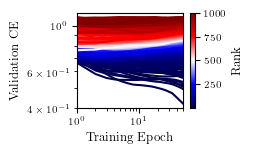

0it [00:00, ?it/s]

M.shape=(1000, 50)
R.shape=(1000, 50)


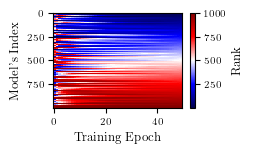

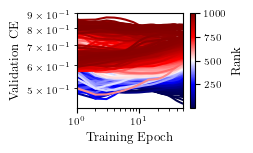

0it [00:00, ?it/s]

M.shape=(1000, 50)
R.shape=(1000, 50)


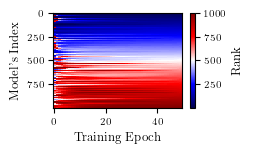

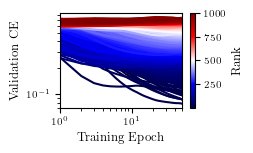

0it [00:00, ?it/s]

M.shape=(1000, 50)
R.shape=(1000, 50)


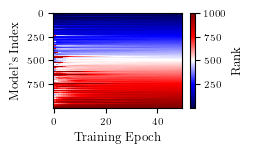

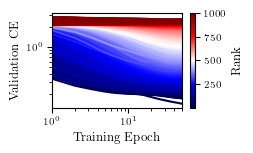

0it [00:00, ?it/s]

M.shape=(1000, 50)
R.shape=(1000, 50)


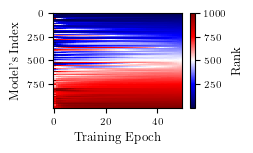

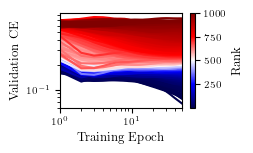

0it [00:00, ?it/s]

M.shape=(1000, 50)
R.shape=(1000, 50)


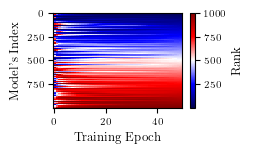

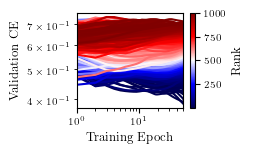

0it [00:00, ?it/s]

M.shape=(1000, 50)
R.shape=(1000, 50)


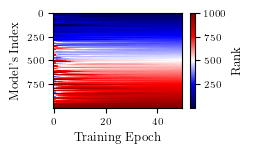

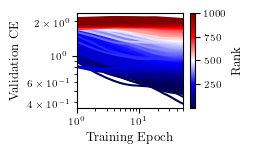

0it [00:00, ?it/s]

M.shape=(1000, 50)
R.shape=(1000, 50)


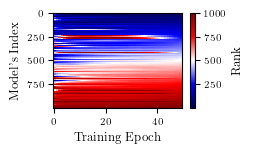

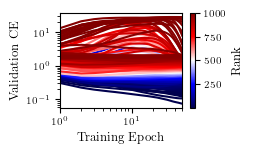

0it [00:00, ?it/s]

M.shape=(1000, 50)
R.shape=(1000, 50)


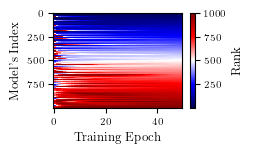

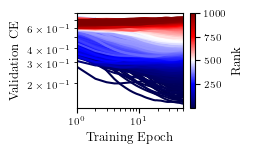

0it [00:00, ?it/s]

M.shape=(1000, 50)
R.shape=(1000, 50)


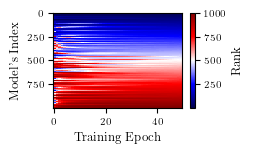

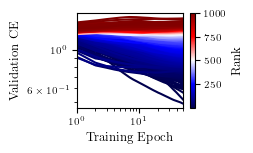

0it [00:00, ?it/s]

M.shape=(1000, 50)
R.shape=(1000, 50)


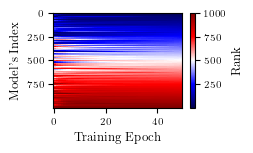

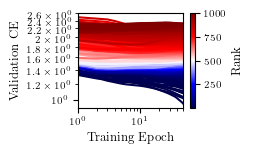

In [9]:
for dataset in tqdm(map_name2openmlid.keys()):

    openmlid = map_name2openmlid[dataset]

    random_state = 42
    rs = np.random.RandomState(random_state)
    num_models = 1_000

    selection = rs.choice(np.arange(lcbench_bench.get_number_of_configs(dataset)), size=num_models, replace=False)

    yahpo_bench.set_instance(openmlid)
    sample_yahpo_config = dict(yahpo_bench.get_opt_space(drop_fidelity_params=True).sample_configuration(1))

    def build_curve(config, min_f=2, max_f=51):
        c = []
        for epoch_i in range(min_f, max_f+1):
            config.update({"epoch": epoch_i})
            target = yahpo_bench.objective_function(config)
            c.append(target[0]["val_cross_entropy"])
        return c

    M = []
    for i, configid in tqdm(enumerate(selection)):
        config_lcbench = lcbench_bench.get_config(dataset, str(configid))
        config_lcbench = {k:v for k,v in config_lcbench.items() if k in sample_yahpo_config}

        config = sample_yahpo_config.copy()
        config.update(config_lcbench)

        y = build_curve(config)
        y = np.asarray(y).reshape(1, -1)
        C = np.mean(y, axis=0).tolist()
        M.append(C)
    M = np.asarray(M)
    print(f"{M.shape=}")

    # ranking matrix per step
    R = rankdata(M, axis=0)
    print(f"{R.shape=}")

    idx_sorting = np.argsort(R[:,-1])
    
    # Stability of Ranking
    plt.figure()
    plt.imshow(R[idx_sorting], cmap="seismic", interpolation="nearest", aspect="auto")
    plt.colorbar(label="Rank")
    plt.xlabel("Training Epoch")
    plt.ylabel("Model's Index")
    plt.tight_layout()
    plt.savefig(f"yahpo-plots/heatmap_ranks_yahpo_{dataset}.png")
    plt.show()
    
    # Curves
    cmap = mpl.colormaps["seismic"]

    x = np.arange(1,51)
    fig = plt.figure()
    ax = plt.gca()

    for i in range(M.shape[0]):
        plt.plot(x, M[idx_sorting][i], color=cmap(i/M.shape[0]))

    plt.xscale("log")
    plt.yscale("log")
    plt.xlim(1,50)
    plt.xlabel(r"Training Epoch")
    plt.ylabel("Validation CE")
    norm = mpl.cm.ScalarMappable(norm=None, cmap=cmap)
    norm.set_clim(1, 1000)
    cb = plt.colorbar(norm, ax=ax, label="Rank")
    plt.tight_layout()
    plt.savefig(f"yahpo-plots/ranking_curves_yahpo_{dataset}.png")
    plt.show()

In [41]:
text = r"""
    \begin{subfigure}[b]{0.24\textwidth}
        \centering
        \includegraphics[width=\textwidth]{figures/lcbench/curves/ranking_curves_yahpo_XXX.png}
        \caption{YYY}
        \label{fig:ranking-curves-yahpo-XXX}
    \end{subfigure}"""

text = r"""
    \begin{subfigure}[b]{0.24\textwidth}
        \centering
        \includegraphics[width=\textwidth]{figures/yapho/curves/heatmap_ranks_yahpo_XXX.png}
        \caption{YYY}
        \label{fig:heatmap-yahpo-XXX}
    \end{subfigure}"""

In [42]:
for dataset in sorted(map_name2openmlid.keys()):
    print(text.replace("XXX", dataset).replace("YYY", dataset.replace("_", " ").replace("-", " ")), end="")


    \begin{subfigure}[b]{0.24\textwidth}
        \centering
        \includegraphics[width=\textwidth]{figures/yapho/curves/heatmap_ranks_yahpo_APSFailure.png}
        \caption{APSFailure}
        \label{fig:heatmap-yahpo-APSFailure}
    \end{subfigure}
    \begin{subfigure}[b]{0.24\textwidth}
        \centering
        \includegraphics[width=\textwidth]{figures/yapho/curves/heatmap_ranks_yahpo_Amazon_employee_access.png}
        \caption{Amazon employee access}
        \label{fig:heatmap-yahpo-Amazon_employee_access}
    \end{subfigure}
    \begin{subfigure}[b]{0.24\textwidth}
        \centering
        \includegraphics[width=\textwidth]{figures/yapho/curves/heatmap_ranks_yahpo_Australian.png}
        \caption{Australian}
        \label{fig:heatmap-yahpo-Australian}
    \end{subfigure}
    \begin{subfigure}[b]{0.24\textwidth}
        \centering
        \includegraphics[width=\textwidth]{figures/yapho/curves/heatmap_ranks_yahpo_Fashion-MNIST.png}
        \caption{Fashion MNIST}
      

In [42]:
len(dataset_list)

35